In [1]:
pip install opencv-python mediapipe pyautogui



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata 

In [2]:
import cv2
import mediapipe as mp
import pyautogui

# إعداد Mediapipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)

# إعداد الكاميرا
cap = cv2.VideoCapture(0)

# دقة الشاشة
screen_width, screen_height = pyautogui.size()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # عكس الصورة لتصبح مناسبة للتعامل مع اليد اليمنى
    frame = cv2.flip(frame, 1)

    # الحصول على أبعاد الصورة
    frame_height, frame_width, _ = frame.shape

    # تحويل الصورة إلى صيغة RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # استخراج إحداثيات الأصابع
            index_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
            thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
            middle_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP]

            # تحويل الإحداثيات إلى الشاشة
            x = int(index_finger_tip.x * frame_width)
            y = int(index_finger_tip.y * frame_height)

            # رسم المعالم على الشاشة
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # تحويل الإحداثيات إلى الشاشة
            screen_x = int(index_finger_tip.x * screen_width)
            screen_y = int(index_finger_tip.y * screen_height)

            # تحريك الماوس
            pyautogui.moveTo(screen_x, screen_y)

            # حساب المسافة بين الإبهام والسبابة للنقر بالزر الأيمن
            thumb_index_distance = ((thumb_tip.x - index_finger_tip.x)**2 + 
                                    (thumb_tip.y - index_finger_tip.y)**2) ** 0.5

            # حساب المسافة بين السبابة والوسطى للنقر بالزر الأيسر
            index_middle_distance = ((middle_finger_tip.x - index_finger_tip.x)**2 + 
                                      (middle_finger_tip.y - index_finger_tip.y)**2) ** 0.5

            # النقر بالزر الأيمن إذا كانت المسافة صغيرة
            if thumb_index_distance < 0.05:
                pyautogui.click(button='right')

            # النقر بالزر الأيسر إذا كانت المسافة صغيرة
            if index_middle_distance < 0.05:
                pyautogui.click(button='left')

    # عرض الفيديو
    cv2.imshow("Hand Tracking", frame)

    # الخروج باستخدام مفتاح Q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# تحرير الموارد
cap.release()
cv2.destroyAllWindows()


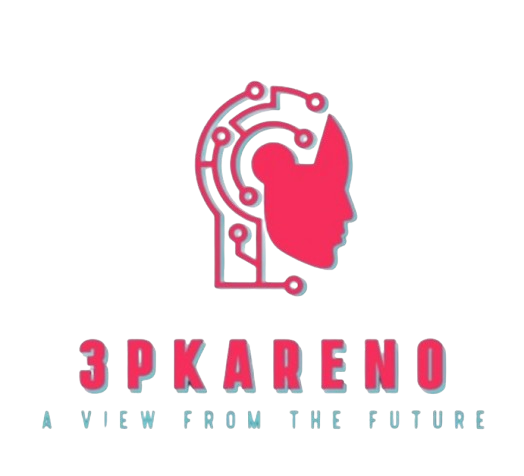